- This study focus in analysing the relation of inflation in Brazil, with *SOME* of the main factors, for the lack of reliable datasets to support all the causations, accordingly with economics theory, and to keep the attention in the main indexes.
- Factors used: Interest Rate (IR); Money Supply (MS); Minimum Wages (MW); General Government Debt (GD); partial inflation rates that forms the final index (Inflation aggregates).    

## Data Preprocessing



In [357]:
from google.colab import drive
drive.mount ('/content/drive')
import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [358]:
# Importing the Datasets
IR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/IR.csv', sep=';', encoding='latin-1')
MS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/MS.csv', sep=';', encoding='latin-1', float_precision='round_trip', decimal='.')
MW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/MW.csv', sep=';', encoding='latin-1')
GD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/GD.csv', sep=';', encoding='latin-1')
Inflation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/INFLATION.csv', sep=';', encoding='latin-1')

In [359]:
# Renaming the Columns
IR.rename(columns = {'Data':'Date', '4390 - Taxa de juros - Selic acumulada no mês - % a.m.':'IntRate'}, inplace=True)
MS.rename(columns = {'Data':'Date', '1786 - BM - Papel moeda emitido (saldo em final de período) - u.m.c. (mil)':'MoneySupply'}, inplace=True)
MW.rename(columns = {'Data':'Date', '1619 - Salário mínimo - u.m.c.':'MinWages'}, inplace=True)
GD.rename(columns = {'Data':'Date', '4501 - Divida líquida do governo geral - Saldos em R$ milhões - R$ (milhões)':'GovDebt'}, inplace=True)
Inflation.rename(columns = {'Data':'Date', '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal':'INFLATION',
                            '1635 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Alimentação e bebidas - Var. % mensal':'Food',
                            '1636 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Habitação - Var. % mensal':'Housing',
                            '1637 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Artigos de residência - Var. % mensal':'HouseItems',
                            '1638 - Índice nacional de preços ao consumidor-Amplo (IPCA)- Vestuário - Var. % mensal':'Clothing',
                            '1639 - Índice de nacional de preços ao consumidor-Amplo (IPCA) - Transportes - Var. % mensal':'Transport',
                            '1640 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Comunicação - Var. % mensal':'Communication',
                            '1641 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Saúde e cuidados pessoais - Var. % mensal':'Health',
                            '1642 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Despesas pessoais - Var. % mensal':'Personal',
                            '1643 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Educação - Var. % mensal': 'Education'}, inplace=True)

In [360]:
# Cropping the Dates, from January/2000 to October/2021
pd.set_option('display.max_rows', 10)

# IR
IR_01 = IR[162:424]
IR_01.reset_index(drop=True, inplace=True)

# MS
MS_01 = MS[240:502]
MS_01.reset_index(drop=True, inplace=True)
#MS_01['MoneySupply'] = MS_01['MoneySupply'].str.replace(r'\W', '') # replace all special chars to 'x'


# MW
MW_01 = MW[120:382]
MW_01.reset_index(drop=True, inplace=True)
#MW_01['MinWages'] = MW_01['MinWages'].str.replace(r'\W', '') 


# GD
GD_01 = GD[24:286]
GD_01.reset_index(drop=True, inplace=True) 
#GD_01['GovDebt'] = GD_01['GovDebt'].str.replace(r'\W', '') 

# Inflation
Inflation_01 = Inflation[240:502]
Inflation_01.reset_index(drop=True, inplace=True)


In [361]:
# Merging all the cropped datasets
Cropped = Inflation_01.merge(IR_01, on='Date')
Cropped1 = Cropped.merge(MS_01, on='Date')
Cropped2 = Cropped1.merge(MW_01, on='Date') 
Cropped3 = Cropped2.merge(GD_01, on='Date')

# Changing Columns order
Cropped3 = Cropped3.reindex(columns = ['Date','IntRate','MoneySupply', 'MinWages', 'GovDebt', 'Food', 'Housing', 'HouseItems', 'Clothing', 'Transport',
                                        'Communication', 'Health', 'Personal', 'Education', 'INFLATION'])
Cropped3.drop('Date', axis=1, inplace=True)
Cropped3 = Cropped3.apply(lambda x: x.str.replace(',', '.')) # Replace all ',' to '.'

# Cropped3 = Cropped3.apply(lambda col:pd.to_numeric(col))
# pd.set_option('display.precision', 2)
# pd.set_option('float_format', '{:.2f}'.format)

# Exporting the formatted dataset
Cropped3.to_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/Dataset.csv', index=False)
Dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRAZIL inflation/Dataset.csv', float_precision='round_trip')


Dataset

,IntRate,MoneySupply,MinWages,GovDebt,Food,Housing,HouseItems,Clothing,Transport,Communication,Health,Personal,Education,INFLATION
0,1.46,24.199.689,136.00,492.136.23,0.84,0.19,0.43,0.21,0.39,1.82,0.59,0.12,3.05,0.62
1,1.45,23.068.674,136.00,494.285.94,-0.25,0.01,0.29,-0.67,0.40,0.04,0.22,0.36,1.32,0.13
2,1.45,22.732.484,136.00,493.089.13,-0.46,0.17,0.28,-1.44,1.68,0.07,0.27,-0.07,-0.26,0.22
3,1.30,23.279.829,151.00,500.897.64,-0.36,0.00,0.19,0.72,0.51,-0.29,0.07,3.55,0.01,0.42
4,1.49,22.470.333,151.00,505.608.51,-0.67,0.45,0.25,0.35,0.13,0.18,0.03,0.13,0.07,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.31,340.095.553,1.100.00,5.133.428.61,0.43,1.10,1.09,1.21,0.41,-0.12,0.51,0.29,0.05,0.53
258,0.36,343.812.587,1.100.00,5.191.114.72,0.60,3.10,0.78,0.53,1.52,0.12,-0.65,0.45,0.18,0.96
259,0.43,341.302.698,1.100.00,5.212.554.57,1.39,0.68,0.99,1.02,1.46,0.23,-0.04,0.64,0.28,0.87
260,0.44,336.844.324,1.100.00,5.262.849.94,1.02,2.56,0.90,0.31,1.82,0.07,0.39,0.56,-0.01,1.16


 ## EDA


In [362]:

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IntRate        262 non-null    float64
 1   MoneySupply    262 non-null    object 
 2   MinWages       262 non-null    object 
 3   GovDebt        262 non-null    object 
 4   Food           262 non-null    object 
 5   Housing        262 non-null    object 
 6   HouseItems     262 non-null    object 
 7   Clothing       262 non-null    object 
 8   Transport      262 non-null    object 
 9   Communication  262 non-null    object 
 10  Health         262 non-null    object 
 11  Personal       262 non-null    object 
 12  Education      262 non-null    float64
 13  INFLATION      262 non-null    object 
dtypes: float64(2), object(12)
memory usage: 28.8+ KB


In [363]:
Dataset.describe()

,IntRate,Education
count,262.00,262.00
mean,0.96,0.55
std,0.40,1.33
min,0.13,-3.47
25%,0.68,0.04
50%,0.94,0.13
75%,1.23,0.35
max,2.08,6.70


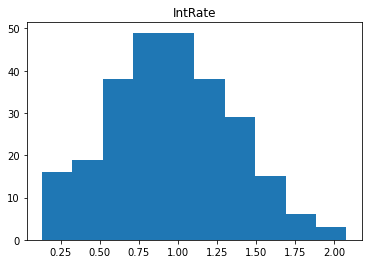

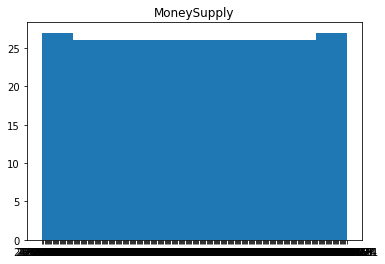

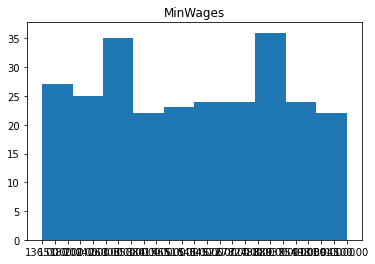

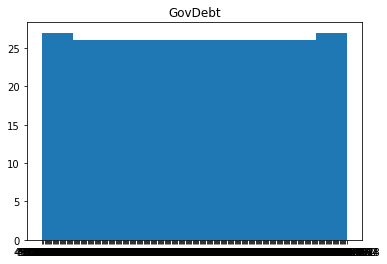

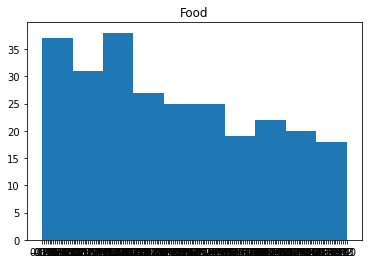

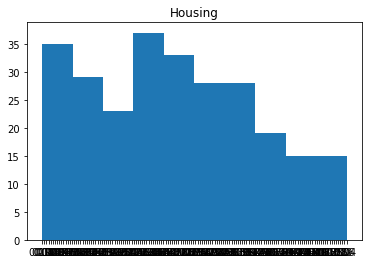

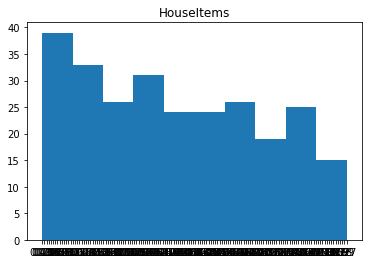

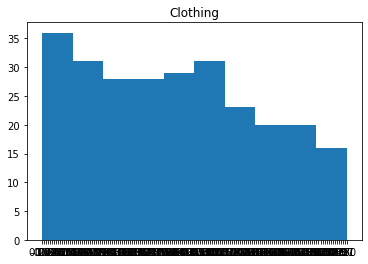

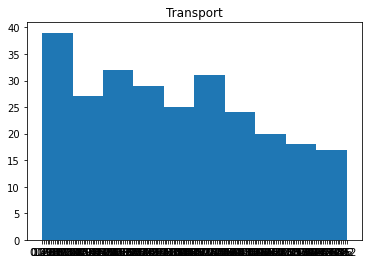

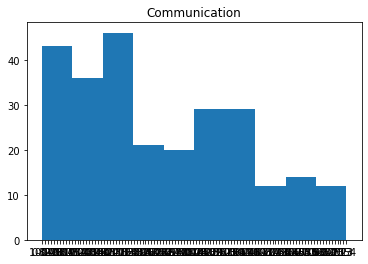

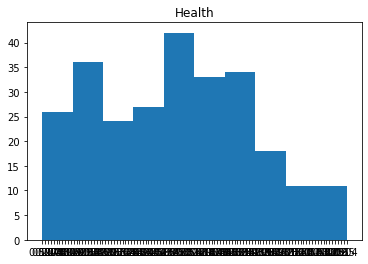

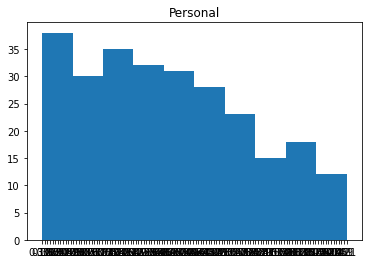

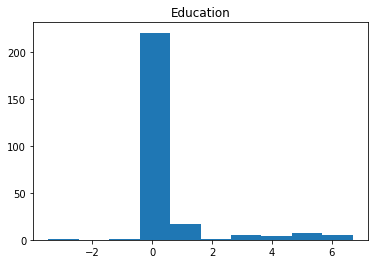

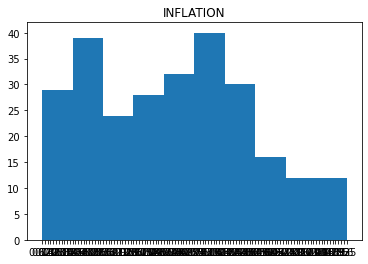

In [364]:
# Distributions of the columns

import seaborn as sns
import matplotlib.pyplot as plt

for i in Dataset.columns:
  plt.hist(Dataset[i])
  plt.title(i)
  plt.show()

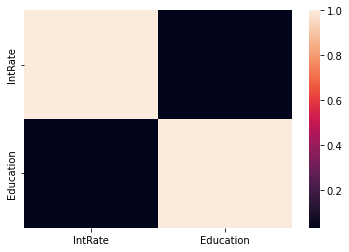

In [365]:
sns.heatmap(Dataset.corr())